In [1]:
# make_partitions
import community as community_louvian
import networkx as nx
import json

with open("/home/pooneh/Desktop/OpenWPM/jsons/AST/wayback_results/2020/nodes_tuple.json", "rt") as nod:
    nodes_list = json.load(nod)
nodes = [tuple(l) for l in nodes_list]
with open("/home/pooneh/Desktop/OpenWPM/jsons/AST/wayback_results/2020/edges_tuple.json", "rt") as ed:
    edges_list = json.load(ed)
edges = [tuple(ee) for ee in edges_list]

#edge_weight = []
#for ed in edges_list:
    #edge_weight.append(edges_list[i][2])
G = nx.Graph()
G.add_nodes_from(nodes)
G.add_edges_from(edges)


In [2]:
path = "/home/pooneh/Desktop/OpenWPM/jsons/AST/wayback_results/2020/graph.graphml"
nx.write_graphml(G, path) 

KeyboardInterrupt: 

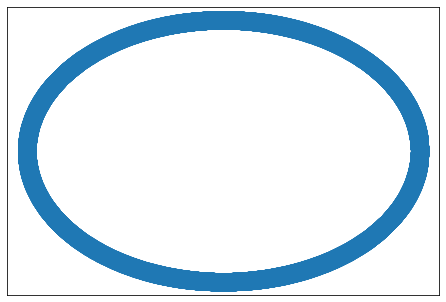

In [33]:
# Draw Graph
import matplotlib.pyplot as plt
nx.draw_shell(G, with_labels=True)
plt.show()

In [29]:
partition = community_louvian.best_partition(G, weight='weight', resolution=0.88)
num_of_partitions = len(set(partition.values()))
print(num_of_partitions)

66


In [17]:
#assign apis to groups
with open("/home/pooneh/Desktop/OpenWPM/jsons/AST/wayback_results/2020/api_hash_frac.json", "rt") as api:
    api_hash_fract = json.load(api)
louvain_part = {}
# assign each api to a group which is made by louvain
for key, value in partition.items():
    api_hash_fract[key]['louvain_partitioning'] = value
with open("/home/pooneh/Desktop/OpenWPM/jsons/AST/wayback_results/2020/api_hash_frac_louvian_0.80.json","w") as lo:
    json.dump(api_hash_fract, lo, indent=4)

In [18]:
### start from here if you need resolution 0.95
from collections import OrderedDict
from operator import getitem

with open("/home/pooneh/Desktop/OpenWPM/jsons/AST/wayback_results/2020/api_hash_frac_louvian_0.80.json", "rt") as api:
    api_clustered = json.load(api)
louvian_clustered = {}
for api_key, value in api_clustered.items():
    louvian_clustered[api_key] = {'weight': value['weight'], 'script': value['scripts'], 'group': value['louvain_partitioning']}


sorted_dict = OrderedDict(sorted(louvian_clustered.items(), key = lambda x:getitem(x[1],'weight'), reverse=True))

with open("/home/pooneh/Desktop/OpenWPM/jsons/AST/wayback_results/2020/sorted_louvian_0.80.json","w") as lo:
    json.dump(sorted_dict, lo, indent=4)

In [19]:
##Clustering based on group
with open("/home/pooneh/Desktop/OpenWPM/jsons/AST/wayback_results/2020/api_hash_frac_louvian_0.80.json", "rt") as api:
    api_louvain = json.load(api)
louvain_group = {}
#print(num_of_partitions)
print(len(api_louvain.items()))
api_list  = []
fraction = 0
for i in range(num_of_partitions):
    for api_key, value in api_louvain.items():
        if value['louvain_partitioning'] == i:
            #print(api_key, value['louvain_partitioning'])
            api_list.append(api_key)
            fraction = fraction + value['weight']
    louvain_group[str(i)] = {'api_list': api_list, 'fraction': fraction}
    fraction = 0
    api_list  = []
    
with open("/home/pooneh/Desktop/OpenWPM/jsons/AST/wayback_results/2020/grouped_dict_0.80.json","w") as lo:
    json.dump(louvain_group, lo, indent=4)

4192


In [24]:
# density of fp_apis
with open("/home/pooneh/Desktop/OpenWPM/myCodes/AST/jsons/fingerprinting_js2.txt", 'r') as file:
    bench_lib = file.read().splitlines()
#print(bench_lib)
with open("/home/pooneh/Desktop/OpenWPM/jsons/AST/wayback_results/2020/sorted_louvian_0.95.json", "rt") as r:
    sorted_louvian = json.load(r)

with open("/home/pooneh/Desktop/OpenWPM/jsons/AST/wayback_results/2020/grouped_dict_0.95.json", "rt") as lo:
    louvain_group = json.load(lo)


    
for i in range(num_of_partitions):
    fp_api = 0
    for api_key, value in sorted_louvian.items():
        if value['group'] == i and value['weight'] == 10000:
            fp_api +=1
    print(i, fp_api)

0 50
1 0
2 0
3 0
4 0
5 0
6 0
7 0
8 0
9 0
10 0
11 0
12 0
13 0
14 0
15 0
16 0
17 0
18 0
19 0
20 0
21 0
22 0
23 0
24 0
25 0
26 0
27 0
28 0
29 0
30 0
31 0
32 0
33 0
34 0
35 0
36 0
37 0
38 0
39 0
40 0
41 0
42 0
43 0
44 0
45 0
46 0
47 0
48 0
49 0
50 0
51 0
52 0
53 0
54 0
55 0
56 0
57 0
58 0
59 0
60 0
61 0
62 0
63 0
64 0
65 0
66 0
67 0
68 0
69 0
70 0
71 0
72 0
73 0
74 0
75 0
76 0
77 0
78 0
79 0
80 0
81 0
82 0
83 0
84 0
85 0
86 0
87 0
88 0
89 0
90 0
91 0
92 0
93 0
94 0
95 0
96 0
97 0
98 0
99 0
100 0
101 0
102 0
103 0
104 0
105 0
106 0
107 0
108 0
109 0
110 0
111 0
112 0
113 0
114 0
115 0
116 0
117 0
118 0
119 0
120 0
121 0
122 0
123 0
124 0
125 0
126 0
127 0
128 0
129 0
130 0
131 0
132 0
133 0
134 0
135 0
136 0
137 0
138 0
139 0
140 0
141 0
142 0
143 0


In [27]:
# calculate similarity with fpjs2
with open("/home/pooneh/Desktop/OpenWPM/jsons/AST/wayback_results/2020/sorted_louvian_0.88.json", "rt") as r:
    sorted_louvian = json.load(r)

with open("/home/pooneh/Desktop/OpenWPM/jsons/AST/wayback_results/2020/grouped_dict_0.88.json", "rt") as lo:
    louvain_group = json.load(lo)
    
with open("/home/pooneh/Desktop/OpenWPM/myCodes/AST/jsons/fingerprinting_js2.txt", 'r') as file:
    bench_lib = file.read().splitlines()


for key_group, value_api in louvain_group.items():
    danger = 0
    for api in value_api['api_list']:
        if api in bench_lib:
            danger+=1
    print(key_group, 100*danger/(len(bench_lib)))


    
        
            

0 6.923076923076923
1 73.84615384615384
2 6.153846153846154
3 3.8461538461538463
4 3.076923076923077
5 5.384615384615385
6 0.0
7 0.0
8 0.0
9 0.0
10 0.0
11 0.0
12 0.0
13 0.0
14 0.0
15 0.0
16 0.0
17 0.0
18 0.0
19 0.0
20 0.0
21 0.0
22 0.0
23 0.0
24 0.7692307692307693
25 0.0
26 0.0
27 0.0
28 0.0
29 0.0
30 0.0
31 0.0
32 0.0
33 0.0
34 0.0
35 0.0
36 0.0
37 0.0
38 0.0
39 0.0
40 0.0
41 0.0
42 0.0
43 0.0
44 0.0
45 0.0
46 0.0
47 0.0
48 0.0
49 0.0
50 0.0
51 0.0
52 0.0
53 0.0
54 0.0
55 0.0
56 0.0
57 0.0
58 0.0
59 0.0
60 0.0
61 0.0
62 0.0
63 0.0
64 0.0
65 0.0
66 0.0


In [ ]:

for key_group, value_api_list in louvain_group.items():
    

In [28]:
for key, value in louvain_group.items():
    print(key, len(value['api_list']))

0 2273
1 355
2 775
3 366
4 115
5 210
6 6
7 1
8 2
9 1
10 19
11 1
12 1
13 2
14 1
15 1
16 1
17 1
18 1
19 2
20 2
21 1
22 7
23 1
24 2
25 1
26 1
27 1
28 1
29 1
30 1
31 1
32 1
33 1
34 1
35 1
36 1
37 1
38 1
39 1
40 3
41 1
42 1
43 1
44 1
45 1
46 1
47 1
48 1
49 1
50 1
51 2
52 1
53 1
54 1
55 1
56 1
57 1
58 1
59 1
60 1
61 1
62 1
63 1
64 1
65 1
66 1


In [ ]:
for key, value in sort